![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción de gasto por deterioro en las sociedades fiduciarias**

**Métodos estadísticos para analítica de datos** <br>

Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

In [1]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

/home/danielcardenas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = 'https://raw.githubusercontent.com/LordOnion88/MAD/refs/heads/main/Series%20de%20Tiempo/Proyecto/base%20ajustada.csv'
df = pd.read_csv(file_path)
df

,FECHA_CORTE,Ingresos,Deterioro
0,31/01/2016,12556235614,456212289
1,29/02/2016,11948803346,426440399
2,31/03/2016,12124055034,507291741
3,30/04/2016,12268361877,132621564
4,31/05/2016,22885166819,488187217
...,...,...,...
99,30/04/2024,27195720063,11441164891
100,31/05/2024,23126998775,86331878
101,30/06/2024,29758712102,95378649
102,31/07/2024,36122438899,113647065


In [3]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA_CORTE  104 non-null    object
 1   Ingresos     104 non-null    int64 
 2   Deterioro    104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [4]:
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])

/tmp/ipykernel_11000/2928885864.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])


In [5]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['FECHA_CORTE'] # Definir la columna fecha como index
df.drop(columns=['FECHA_CORTE'],inplace=True) # Eliminar la columna fecha
df

,Ingresos,Deterioro
FECHA_CORTE,,
2016-01-31,12556235614,456212289
2016-02-29,11948803346,426440399
2016-03-31,12124055034,507291741
2016-04-30,12268361877,132621564
2016-05-31,22885166819,488187217
...,...,...
2024-04-30,27195720063,11441164891
2024-05-31,23126998775,86331878
2024-06-30,29758712102,95378649


In [6]:
df_gasto = df.copy()
df_gasto = df_gasto.drop(['Ingresos'], axis = 1)
df_gasto

,Deterioro
FECHA_CORTE,
2016-01-31,456212289
2016-02-29,426440399
2016-03-31,507291741
2016-04-30,132621564
2016-05-31,488187217
...,...
2024-04-30,11441164891
2024-05-31,86331878
2024-06-30,95378649


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

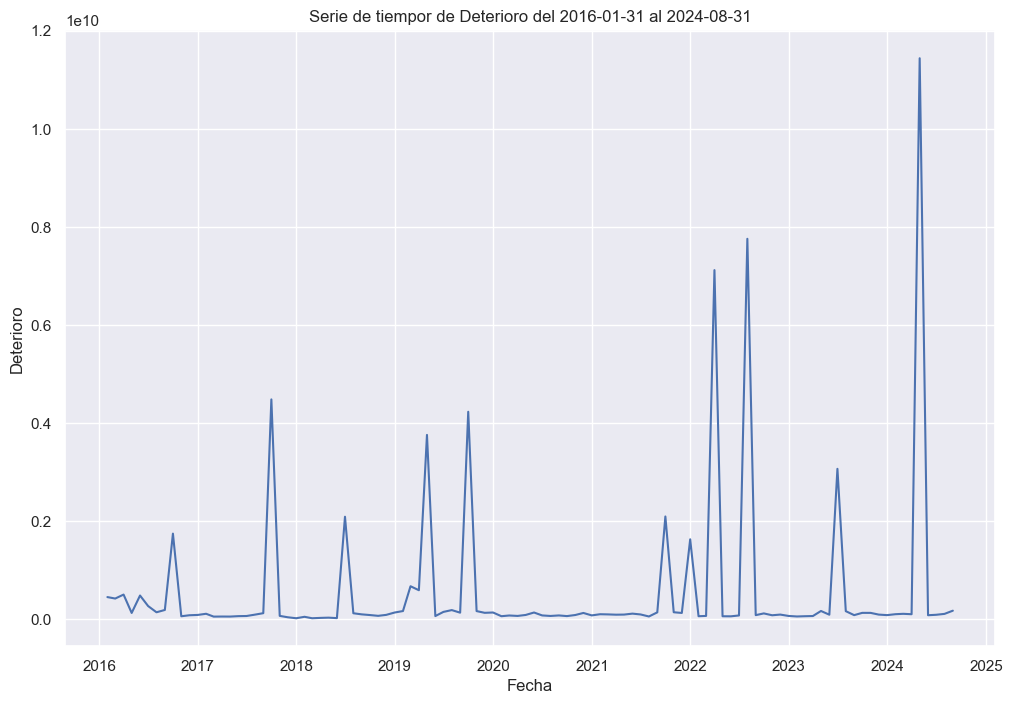

In [7]:
serie_de_tiempo(df_gasto,'Deterioro')

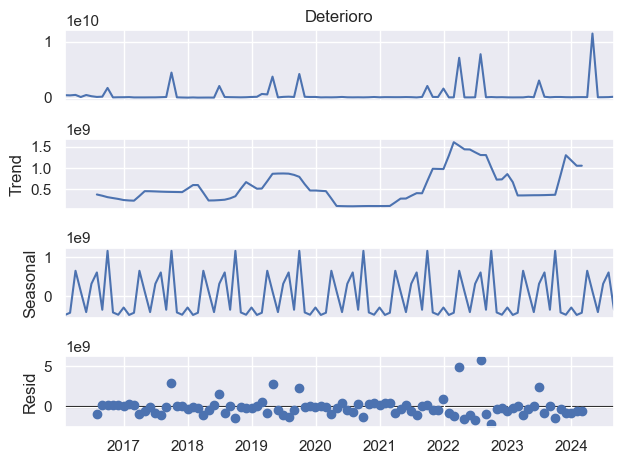

In [8]:
Serie_decompuesta = seasonal_decompose (df_gasto['Deterioro'],model = 'additive', period= 12)
grafico1 = Serie_decompuesta.plot()

In [9]:
df_gasto['log_Deterioro'] = np.log(df_gasto['Deterioro'])
df_gasto.describe()

,Deterioro,log_Deterioro
count,1.040000e+02,104.000000
mean,5.898848e+08,18.823689
std,1.662141e+09,1.266431
min,2.466401e+07,17.020856
25%,7.217045e+07,18.094541
50%,1.008496e+08,18.429062
75%,1.487325e+08,18.817445
max,1.144116e+10,23.160484


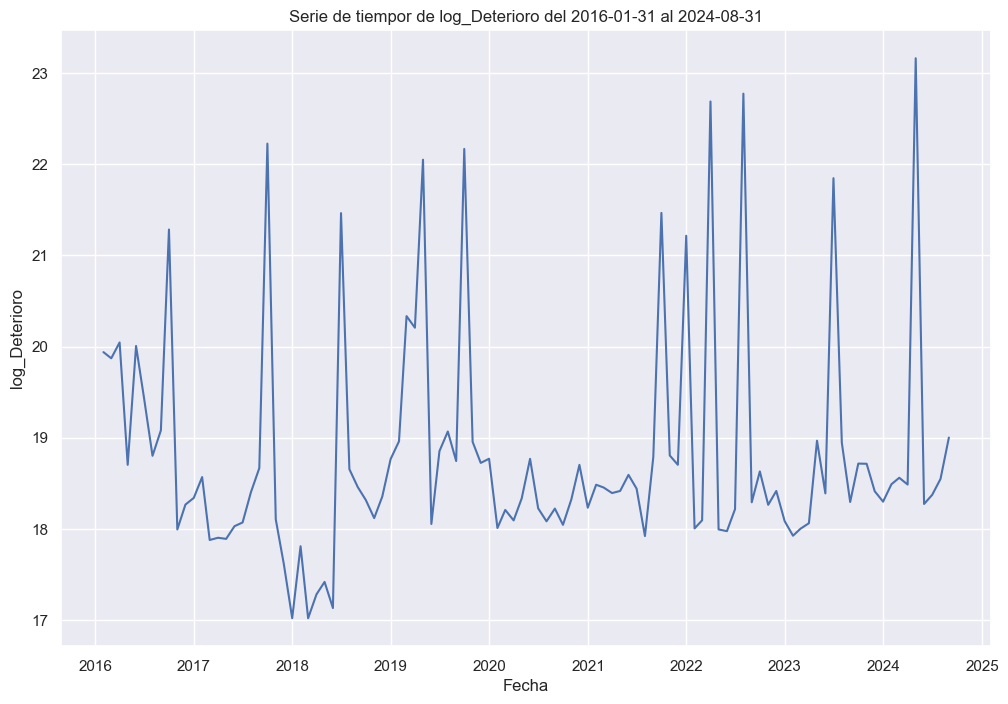

In [10]:
serie_de_tiempo(df_gasto,'log_Deterioro')

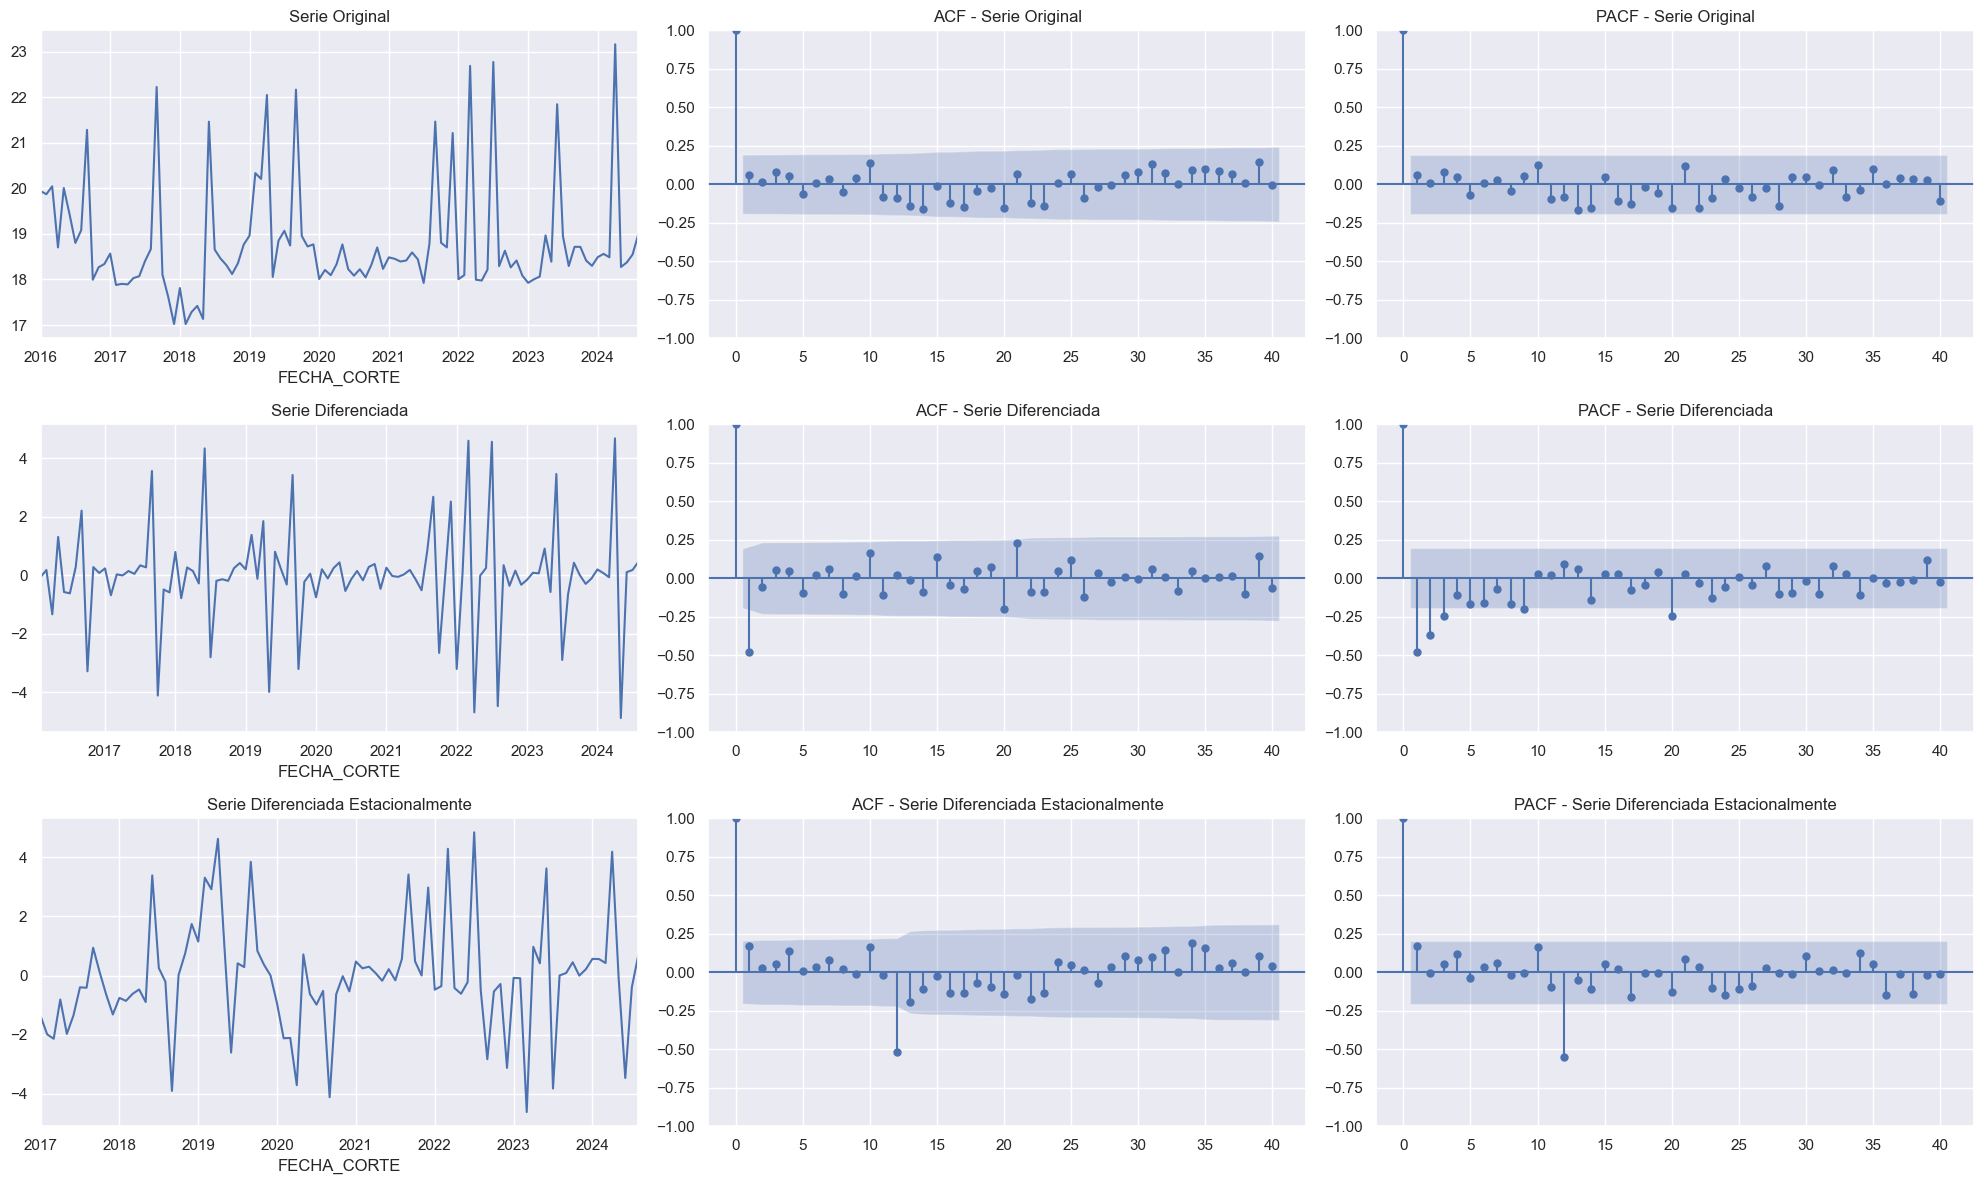

In [11]:
plot_time_series_analysis(df_gasto,'log_Deterioro')

In [12]:
df_gasto['Deterioro'] = df_gasto['log_Deterioro']
df_gasto= df_gasto.drop(columns=['log_Deterioro'])
df_gasto.describe()

,Deterioro
count,104.000000
mean,18.823689
std,1.266431
min,17.020856
25%,18.094541
50%,18.429062
75%,18.817445
max,23.160484


## Analisis Exploratorio de los Datos



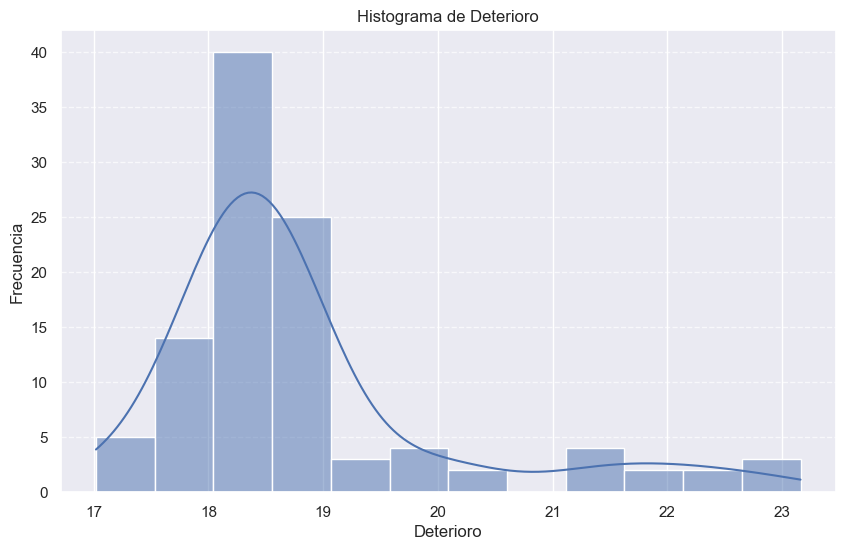

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gasto['Deterioro'], bins=12, kde=True)
plt.title('Histograma de Deterioro')
plt.xlabel('Deterioro')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.show()

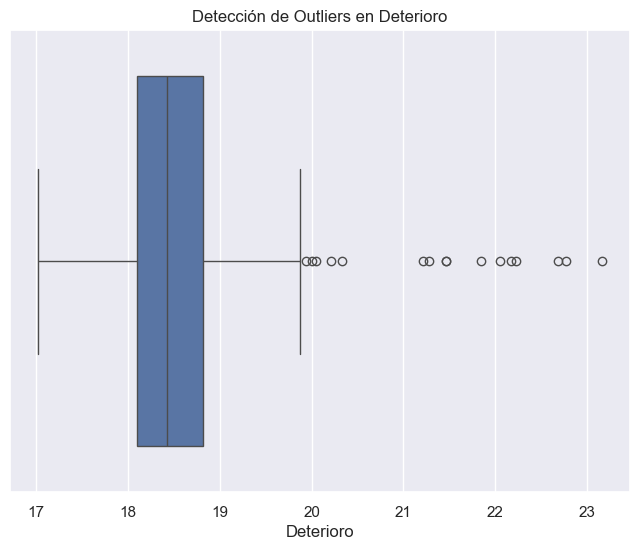

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_gasto['Deterioro'])
plt.title('Detección de Outliers en Deterioro')
plt.show()

In [15]:
print(df_gasto['Deterioro'].describe())

count    104.000000
mean      18.823689
std        1.266431
min       17.020856
25%       18.094541
50%       18.429062
75%       18.817445
max       23.160484
Name: Deterioro, dtype: float64


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


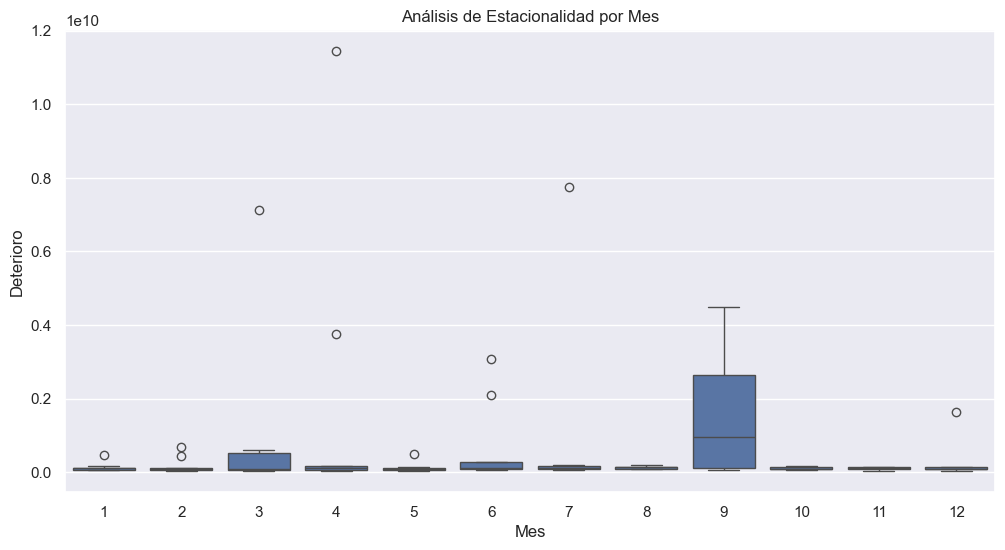

In [16]:
df['Mes'] = df_gasto.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mes', y='Deterioro', data=df)
plt.title('Análisis de Estacionalidad por Mes')
plt.xlabel('Mes')
plt.ylabel('Deterioro')
plt.show()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins


## Identificación

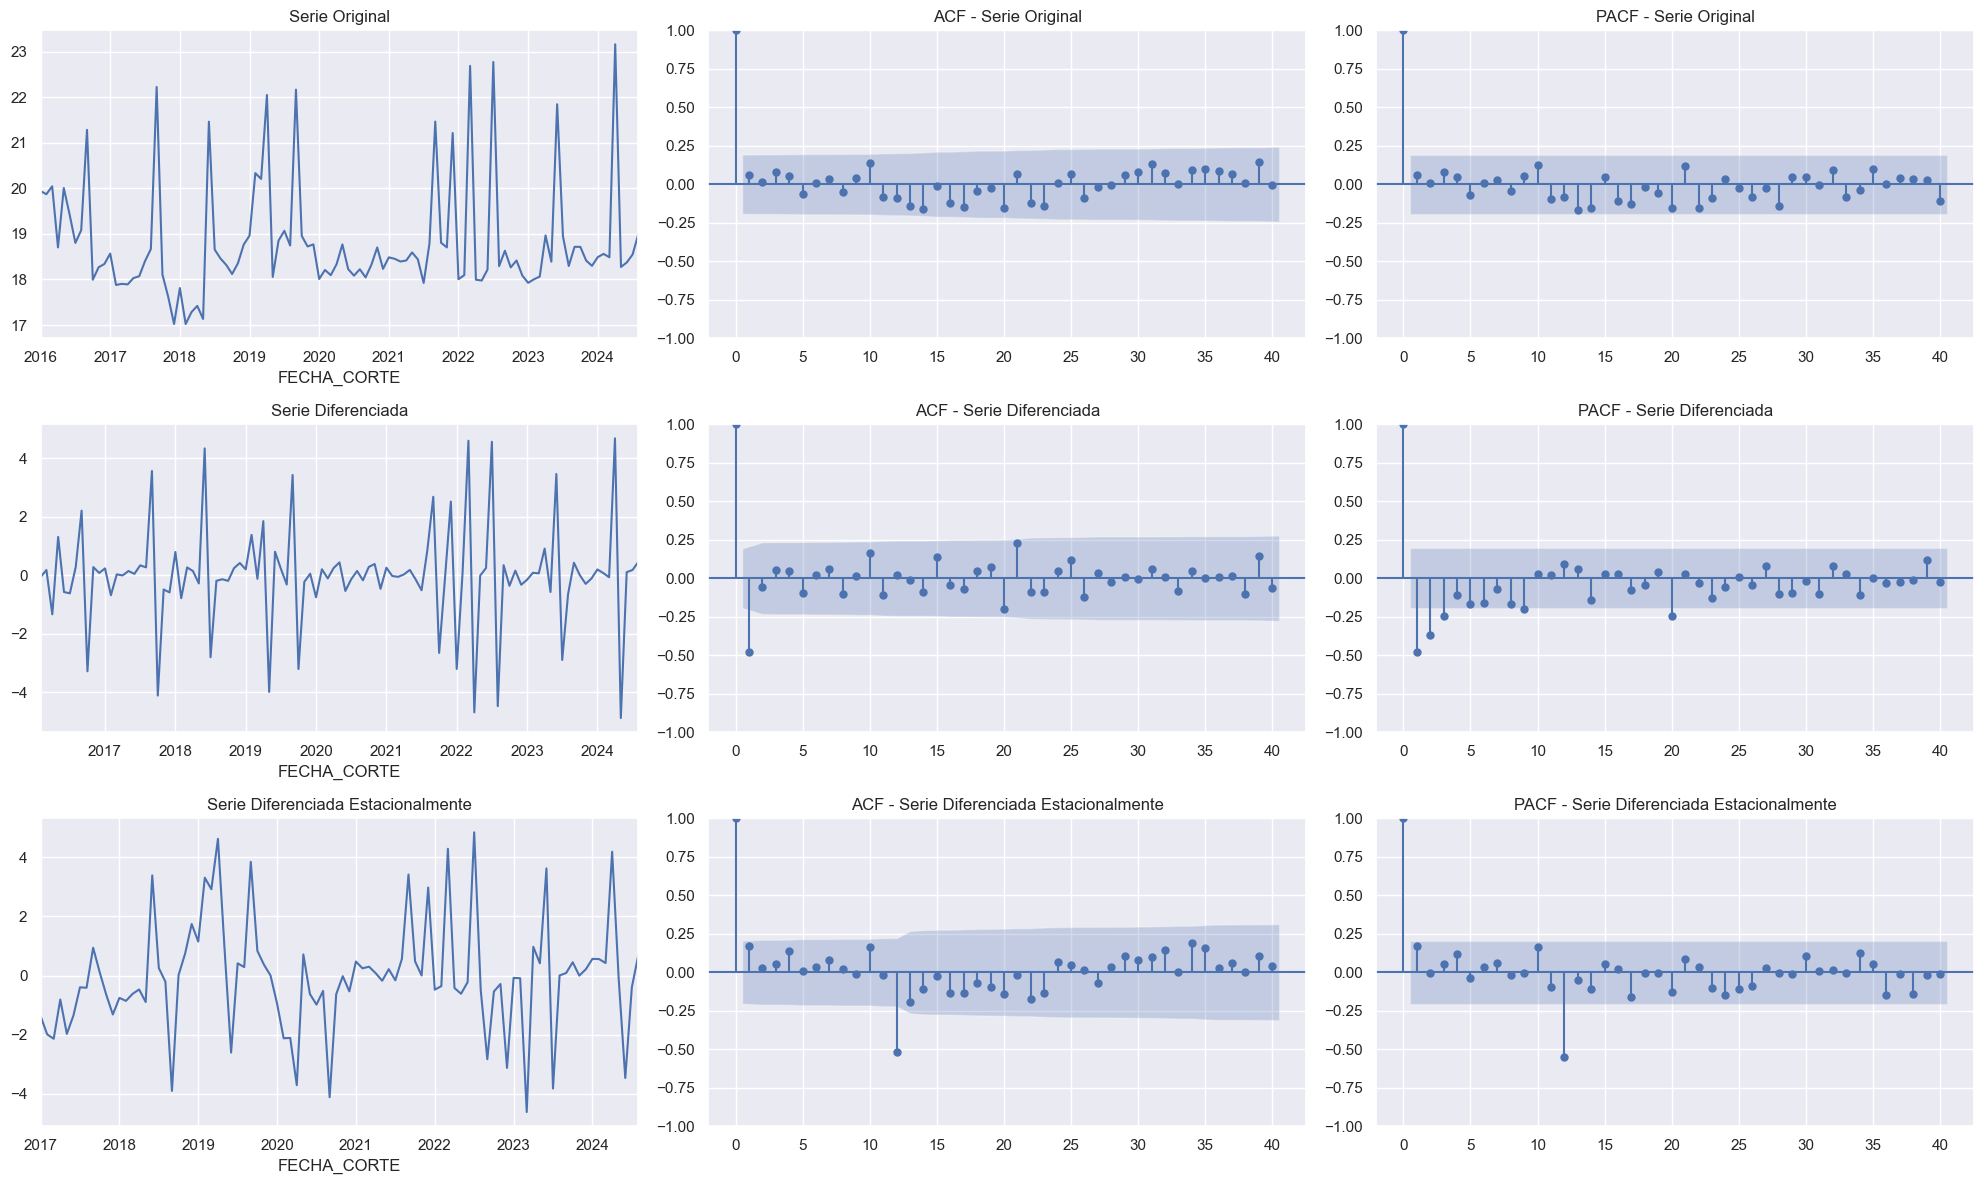

In [17]:
plot_time_series_analysis(df_gasto,'Deterioro')

In [18]:
# prueba de Dickey Fuller para las series

from statsmodels.tsa.stattools import adfuller

SerieOriginal_adf = adfuller(df_gasto['Deterioro'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -9.514616296537788
p-value: 3.181688359835861e-16
Critical Values:
	1%: -3.4954932834550623
	5%: -2.8900369024285117
	10%: -2.5819706975209726


In [19]:
SerieDiferenciada_adf = adfuller(df_gasto['Deterioro'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -6.012506605752682
p-value: 1.5613155425681635e-07
Critical Values:
	1%: -3.5019123847798657
	5%: -2.892815255482889
	10%: -2.583453861475781


In [20]:
SerieDiferenciadaEst_adf = adfuller(df_gasto['Deterioro'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.040174027005319
p-value: 0.0012141581662071983
Critical Values:
	1%: -3.5148692050781247
	5%: -2.8984085156250003
	10%: -2.58643890625


In [21]:
Entrenamiento_df= df_gasto[:98]
Prueba_df= df_gasto[98:]

display(Prueba_df,Entrenamiento_df)

,Deterioro
FECHA_CORTE,
2024-03-31,18.486736
2024-04-30,23.160484
2024-05-31,18.273709
2024-06-30,18.373365
2024-07-31,18.548608
2024-08-31,19.001865


,Deterioro
FECHA_CORTE,
2016-01-31,19.938469
2016-02-29,19.870983
2016-03-31,20.044597
2016-04-30,18.703010
2016-05-31,20.006210
...,...
2023-10-31,18.714621
2023-11-30,18.413283
2023-12-31,18.299040


In [22]:
#%pip install pmdarima
import pmdarima as pm

modelo1 = pm.auto_arima(Entrenamiento_df,seasonal=True,m=12,
                        d=1,D=1,start_p=0,start_q=0, max_p= 4, max_q=4,
                        start_P=0,start_Q=0, max_P= 4, max_Q=4,
                        information_criterion='bic',trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=393.816, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=342.285, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=inf, Time=1.83 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=379.998, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : BIC=341.248, Time=0.64 sec
 ARIMA(1,1,0)(3,1,0)[12]             : BIC=343.415, Time=1.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : BIC=341.889, Time=2.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : BIC=337.448, Time=0.54 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=inf, Time=2.57 sec
 ARIMA(1,1,0)(1,1,2)[12]             : BIC=inf, Time=5.41 sec
 ARIMA(1,1,0)(0,1,2)[12]             : BIC=337.372, Time=0.68 sec
 ARIMA(1,1,0)(0,1,3)[12]             : BIC=341.781, Time=2.61 sec
 ARIMA(1,1,0)(1,1,3)[12]             : BIC=346.224, Time=2.70 sec
 ARIMA(0,1,0)(0,1,2)[12]             : BIC=353.370, Time=1.12 sec
 ARIMA(2,1,0)(0,1,2)[12]             : BIC=33

In [23]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -150.435
Date:                              Tue, 26 Nov 2024   AIC                            312.869
Time:                                      15:22:41   BIC                            327.525
Sample:                                  01-31-2016   HQIC                           318.764
                                       - 02-29-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7112      0.107     -6.618      0.000      -0.922      -0.501
ar.L2         -0.5287      0.113     -4.695      0.000      -0.749      -0.308
ar.L3         -0.3404      0.086     -3.962      0.000      -0.509      -0.172
ar.S.L12      -0.2260      0.203     -1.114      0.265      -0.624       0.172
ma.S.L12      -0.8642      0.415     -2.080      0.038      -1.678      -0.050
sigma2         1.5796      0.471      3.355      0.001       0.657       2.502
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.70   Prob(JB):                         0.03
Heteroskedasticity (H):               1.42   Skew:                             0.48
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicción


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_SM = SARIMAX(Entrenamiento_df,order=(3,1,0),seasonal=(1,1,1,12))
modeloSM_fit = modelo_SM.fit(disp=0)
modeloSM_fit.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Deterioro   No. Observations:                   98
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -164.034
Date:                Tue, 26 Nov 2024   AIC                            336.068
Time:                        15:22:41   BIC                            346.367
Sample:                    01-31-2016   HQIC                           340.232
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7325      0.104     -7.020      0.000      -0.937      -0.528
ar.L2         -0.5223      0.101     -5.162      0.000      -0.721      -0.324
ar.L3         -0.2338      0.080     -2.928      0.003      -0.390      -0.077
sigma2         1.7107      0.171      9.999      0.000       1.375       2.046
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                59.31
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             1.47
Prob(H) (two-sided):                  0.53   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
Pr_stmodels = modeloSM_fit.get_forecast(steps=6).predicted_mean
print ( Pr_stmodels)

2024-03-31    18.436011
2024-04-30    18.445907
2024-05-31    18.487394
2024-06-30    18.481050
2024-07-31    18.461714
2024-08-31    18.469492
Freq: ME, Name: predicted_mean, dtype: float64


In [26]:
!pip install skforecast
from skforecast.Sarimax import Sarimax


modelo_SK = Sarimax(order=(3,1,0),seasonal_order=(1,1,1,12))
modelo_SK.fit(y=Entrenamiento_df)
modelo_SK.summary()


Defaulting to user installation because normal site-packages is not writeable


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Deterioro   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -150.435
Date:                              Tue, 26 Nov 2024   AIC                            312.869
Time:                                      15:22:45   BIC                            327.525
Sample:                                  01-31-2016   HQIC                           318.764
                                       - 02-29-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7112      0.107     -6.618      0.000      -0.922      -0.501
ar.L2         -0.5287      0.113     -4.695      0.000      -0.749      -0.308
ar.L3         -0.3404      0.086     -3.962      0.000      -0.509      -0.172
ar.S.L12      -0.2260      0.203     -1.114      0.265      -0.624       0.172
ma.S.L12      -0.8642      0.415     -2.080      0.038      -1.678      -0.050
sigma2         1.5796      0.471      3.355      0.001       0.657       2.502
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.70   Prob(JB):                         0.03
Heteroskedasticity (H):               1.42   Skew:                             0.48
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
Pr_skforecast = modelo_SK.predict(steps=6)
print(Pr_skforecast)

                 pred
2024-03-31  19.253507
2024-04-30  18.384796
2024-05-31  18.209733
2024-06-30  18.624819
2024-07-31  19.104373
2024-08-31  18.416141


In [28]:
modelo_PD = pm.ARIMA(order=(3,1,0),seasonal_order=(1,1,1,12))
modelo_PD.fit(y=Entrenamiento_df)
modelo_PD.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -150.347
Date:                              Tue, 26 Nov 2024   AIC                            314.694
Time:                                      15:22:46   BIC                            331.793
Sample:                                  01-31-2016   HQIC                           321.572
                                       - 02-29-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0251      0.067      0.374      0.708      -0.106       0.157
ar.L1         -0.7120      0.107     -6.682      0.000      -0.921      -0.503
ar.L2         -0.5300      0.112     -4.741      0.000      -0.749      -0.311
ar.L3         -0.3411      0.087     -3.934      0.000      -0.511      -0.171
ar.S.L12      -0.2222      0.203     -1.093      0.275      -0.621       0.176
ma.S.L12      -0.8745      0.464     -1.884      0.060      -1.784       0.035
sigma2         1.5660      0.504      3.104      0.002       0.577       2.555
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 6.62
Prob(Q):                              0.73   Prob(JB):                         0.04
Heteroskedasticity (H):               1.44   Skew:                             0.46
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
Pr_pmdarima = modelo_PD.predict(steps=6)
print(Pr_pmdarima)

2024-03-31    19.329254
2024-04-30    18.513563
2024-05-31    18.362938
2024-06-30    18.812577
2024-07-31    19.321828
2024-08-31    18.693954
2024-09-30    20.481205
2024-10-31    18.599068
2024-11-30    18.661754
2024-12-31    18.963636
Freq: ME, dtype: float64


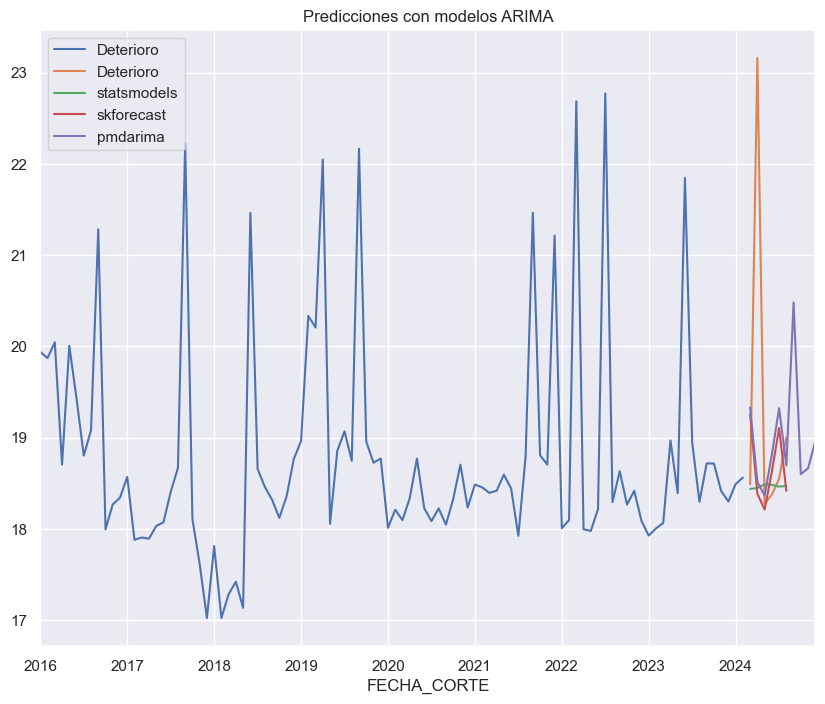

In [30]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(10 , 8))
Entrenamiento_df.plot(ax=ax,label='Entrenamiento')
Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

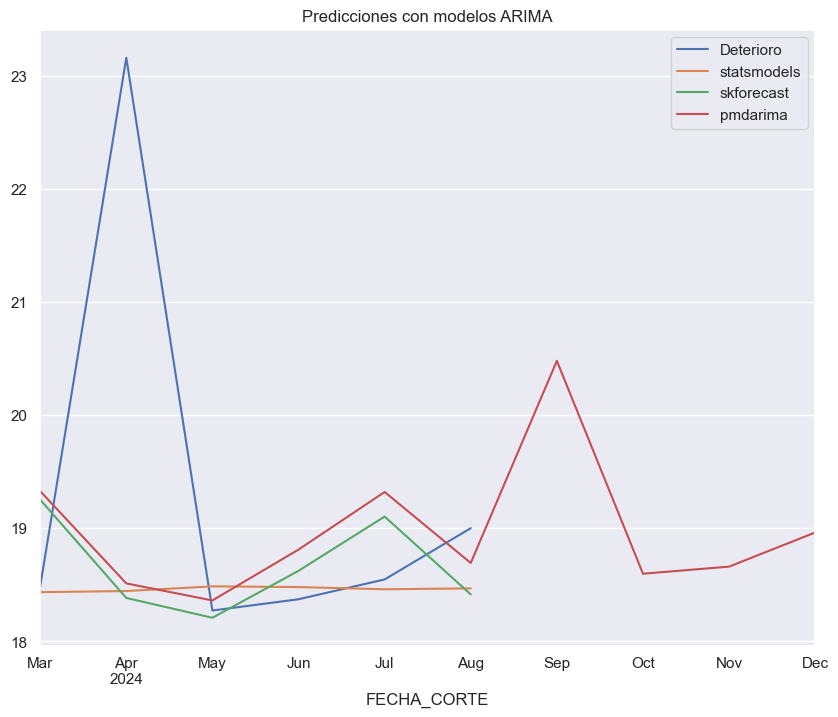

In [31]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()


In [32]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_skforecast)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_skforecast)*100:.2f}%")

MAE 1.17
MSE: 4.02
RMSE: 2.00
MAPE: 5.43%


In [33]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_stmodels)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_stmodels)*100:.2f}%")

MAE 0.95
MSE: 3.76
RMSE: 1.94
MAPE: 4.28%


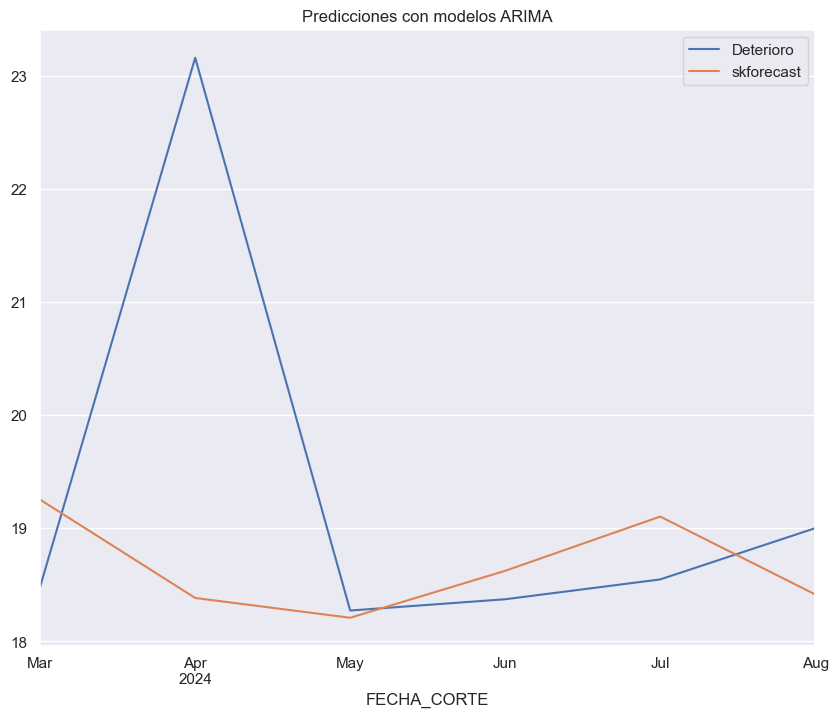

In [34]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

# Suavizado Exponencial


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial simple'}, xlabel='FECHA_CORTE'>

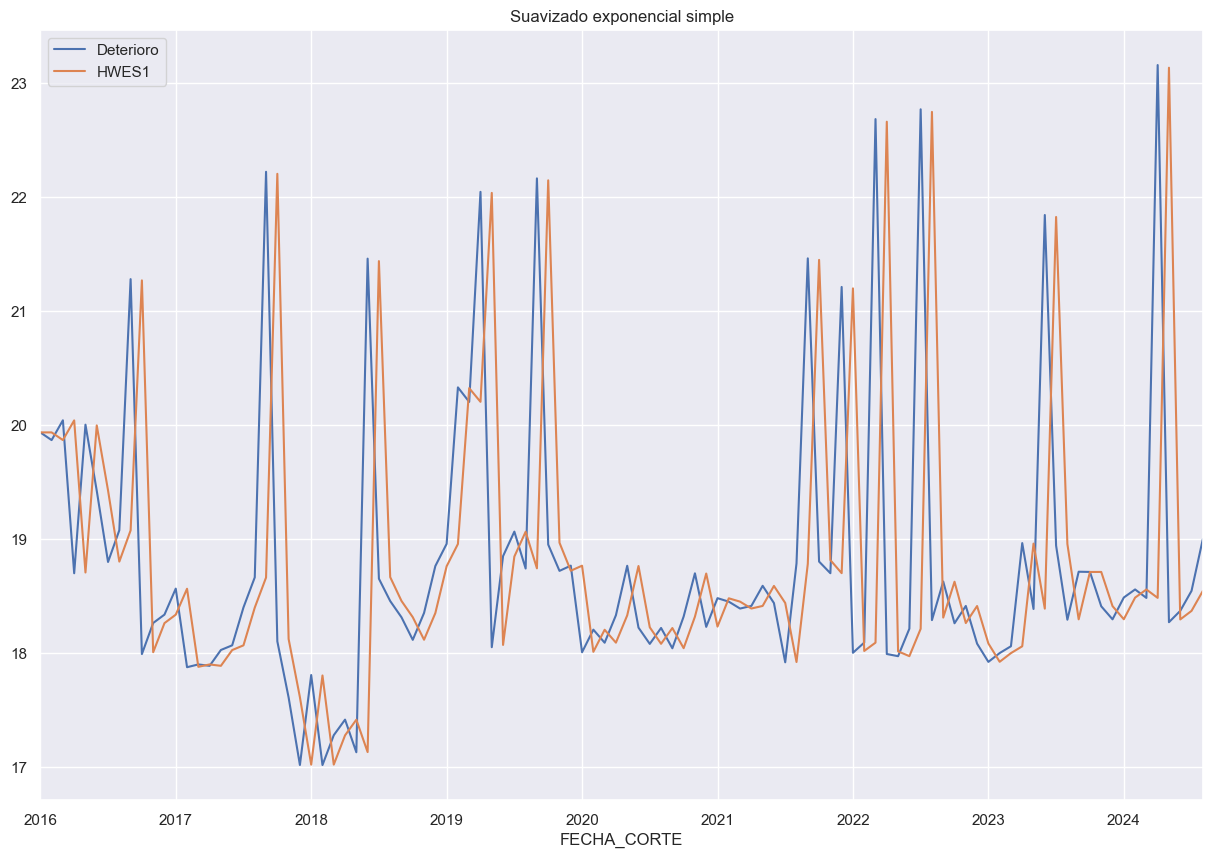

In [35]:
df_s = df_gasto.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['Deterioro']).fit(smoothing_level = 0.995, optimized=False,use_brute=True).fittedvalues
df_s[['Deterioro','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='FECHA_CORTE'>

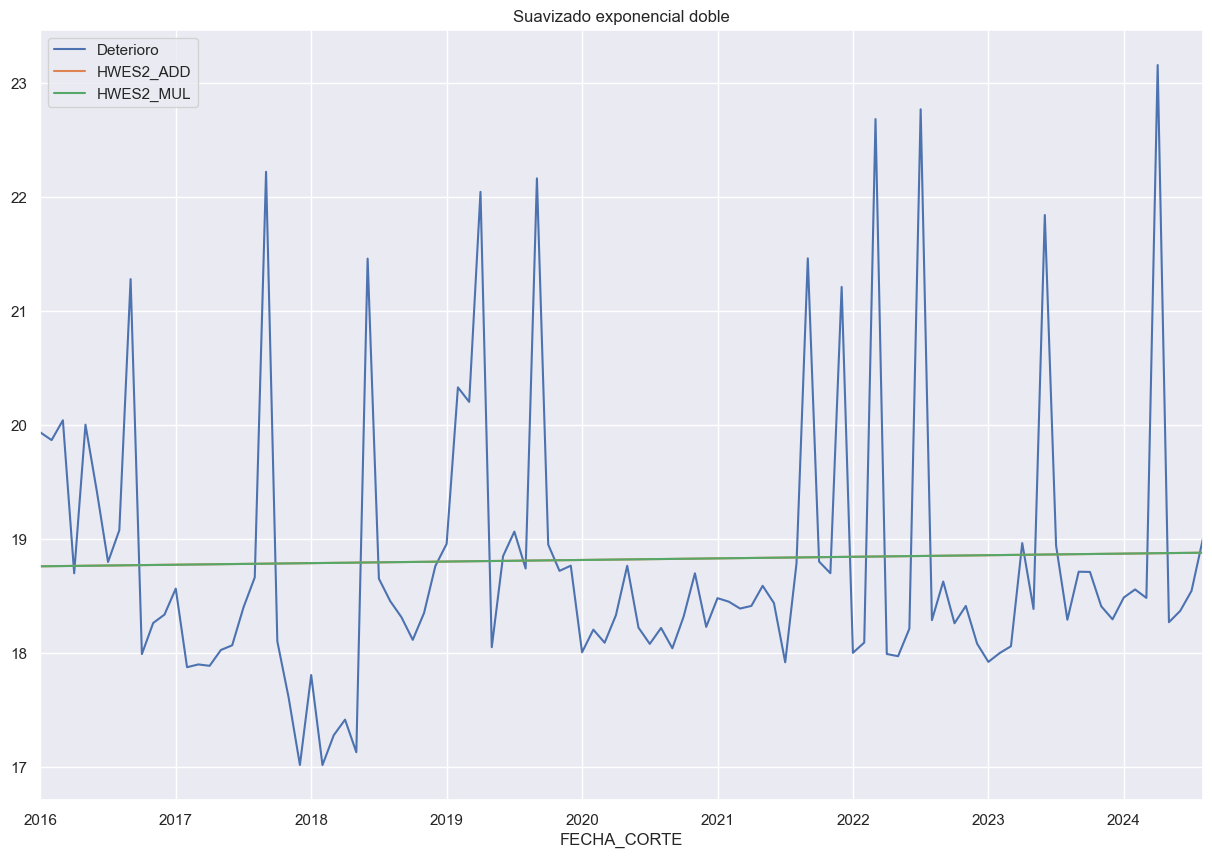

In [36]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul').fit().fittedvalues
df_s[['Deterioro', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='FECHA_CORTE'>

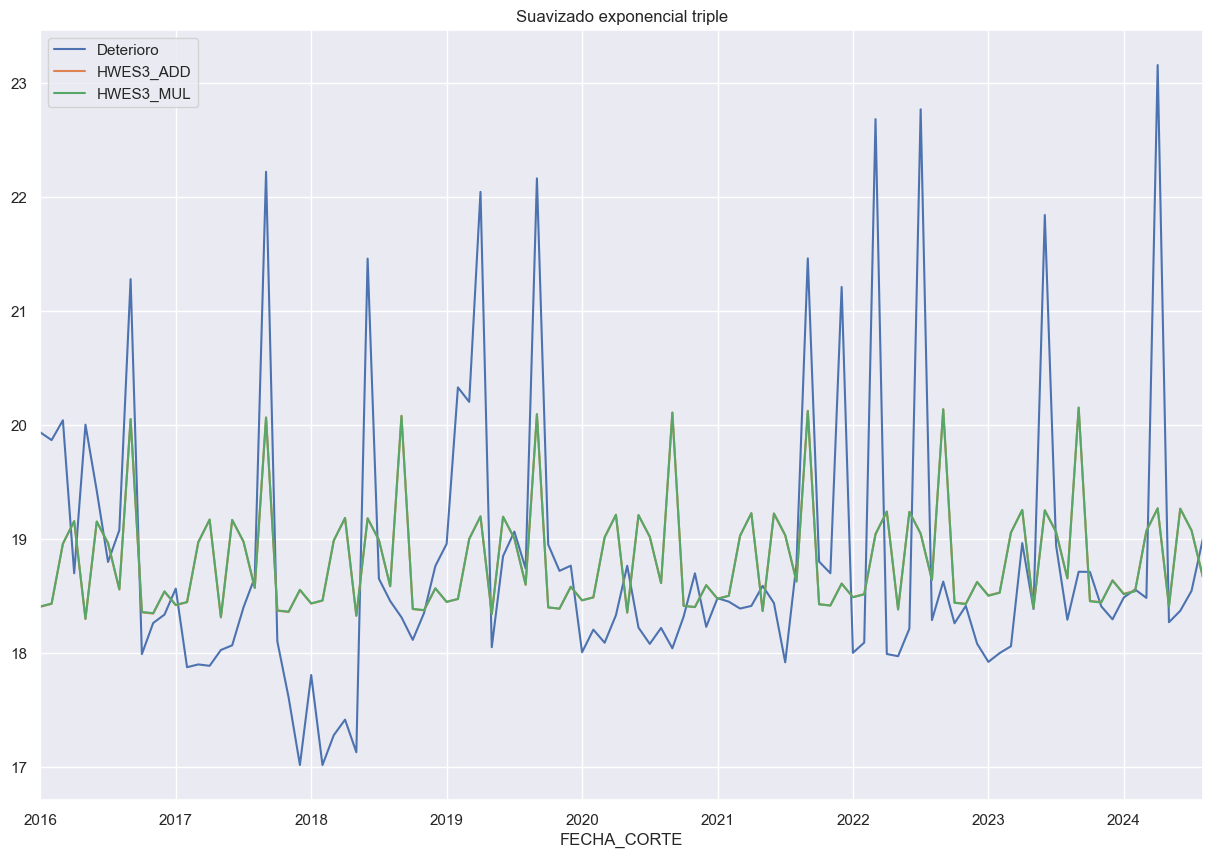

In [37]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['Deterioro', 'HWES3_ADD', 'HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [38]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:98]
Prueba_df_s= df_s[98:]

display(Prueba_df_s,Entrenamiento_df_s)

,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2024-03-31,18.486736,18.560613,18.877428,18.877752,19.074903,19.073366
2024-04-30,23.160484,18.487106,18.878583,18.878917,19.272239,19.272516
2024-05-31,18.273709,23.137117,18.879739,18.880083,18.415426,18.411411
2024-06-30,18.373365,18.298027,18.880895,18.881248,19.270055,19.268818
2024-07-31,18.548608,18.372989,18.882050,18.882413,19.079460,19.078312
2024-08-31,19.001865,18.547730,18.883206,18.883578,18.674217,18.671100


,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2016-01-31,19.938469,19.938469,18.764172,18.763929,18.408908,18.411677
2016-02-29,19.870983,19.938469,18.765328,18.765087,18.434549,18.437517
2016-03-31,20.044597,19.871321,18.766483,18.766245,18.960640,18.962680
2016-04-30,18.703010,20.043730,18.767639,18.767403,19.157976,19.160673
2016-05-31,20.006210,18.709714,18.768795,18.768561,18.301163,18.304566
...,...,...,...,...,...,...
2023-10-31,18.714621,18.714369,18.871649,18.871928,18.460174,18.457369
2023-11-30,18.413283,18.714620,18.872805,18.873093,18.449317,18.446445
2023-12-31,18.299040,18.414790,18.873961,18.874258,18.641149,18.639045


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


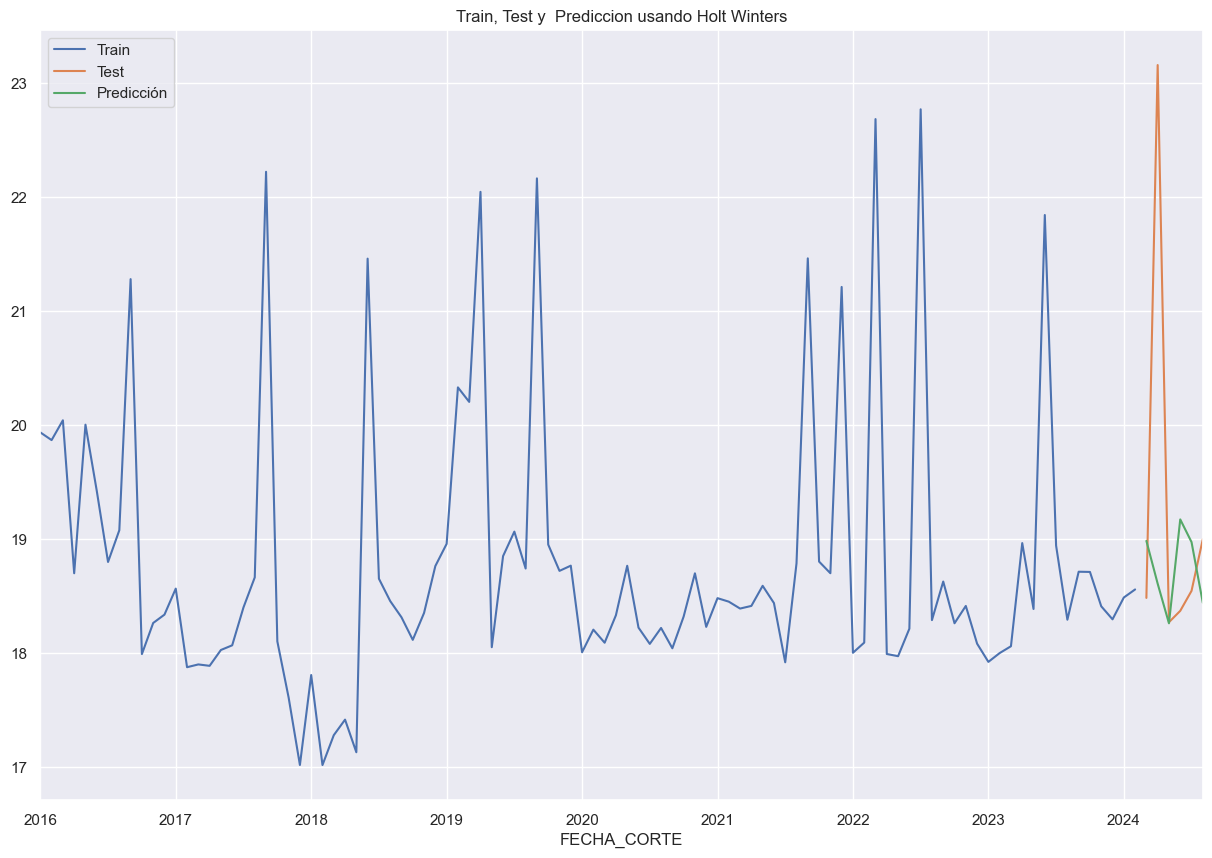

In [39]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Deterioro"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(6)
Entrenamiento_df_s["Deterioro"].plot(legend=True,label="Train")
Prueba_df_s["Deterioro"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='FECHA_CORTE'>

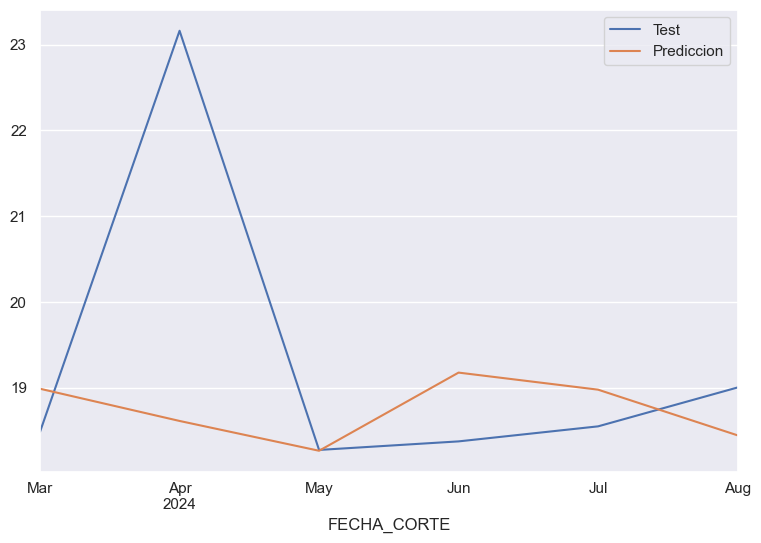

In [40]:
Prueba_df_s['Deterioro'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [41]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["Deterioro"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['Deterioro'], test_predictions)*100:.2f}%")

MAE 1.14
MSE: 3.68
RMSE: 1.92
MAPE: 5.33%


# Prophet

In [42]:
#%pip install prophet

In [43]:
df_p = df_gasto.copy()
df_p.reset_index(inplace=True)
df_p.rename(columns={'FECHA_CORTE':'ds','Deterioro':'y'}, inplace=True)
df_p

,ds,y
0,2016-01-31,19.938469
1,2016-02-29,19.870983
2,2016-03-31,20.044597
3,2016-04-30,18.703010
4,2016-05-31,20.006210
...,...,...
99,2024-04-30,23.160484
100,2024-05-31,18.273709
101,2024-06-30,18.373365
102,2024-07-31,18.548608


In [44]:
Entrenamiento_df_p= df_p[:98]
Prueba_df_p= df_p[98:]

display(Entrenamiento_df_p.tail(), Prueba_df_p.tail())

,ds,y
93,2023-10-31,18.714621
94,2023-11-30,18.413283
95,2023-12-31,18.299040
96,2024-01-31,18.490260
97,2024-02-29,18.560971


,ds,y
99,2024-04-30,23.160484
100,2024-05-31,18.273709
101,2024-06-30,18.373365
102,2024-07-31,18.548608
103,2024-08-31,19.001865


In [45]:
modelo = Prophet(growth='linear')

modelo.fit(Entrenamiento_df_p)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmpwwzinfm9/b0dkmyo3.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpwwzinfm9/6gzihd9t.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9422', 'data', 'file=/tmp/tmpwwzinfm9/b0dkmyo3.json', 'init=/tmp/tmpwwzinfm9/6gzihd9t.json', 'output', 'file=/tmp/tmpwwzinfm9/prophet_modelrph9qpp9/prophet_model-20241126152255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:22:55 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
15:22:55 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [46]:
future = modelo.make_future_dataframe(periods=6,freq='MS')
forecast = modelo.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-31,18.604264,17.228703,19.913964
1,2016-02-29,18.702152,17.322601,20.091830
2,2016-03-31,19.081736,17.736961,20.379666
3,2016-04-30,18.244847,16.824849,19.583852
4,2016-05-31,19.378545,18.027386,20.694798
...,...,...,...,...
99,2024-04-01,19.049824,17.674662,20.457936
100,2024-05-01,16.817369,15.517077,18.210666
101,2024-06-01,22.007305,20.623232,23.346475
102,2024-07-01,17.261648,15.899682,18.683165


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


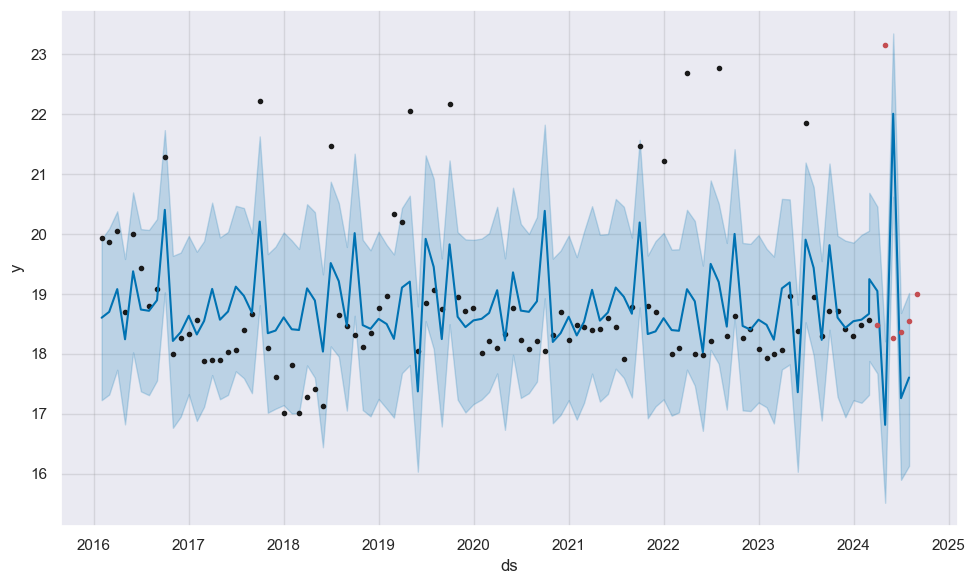

In [47]:
fig = modelo.plot(forecast)
ax = fig.gca()
ax.plot(Prueba_df_p['ds'],Prueba_df_p['y'],'r.')

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

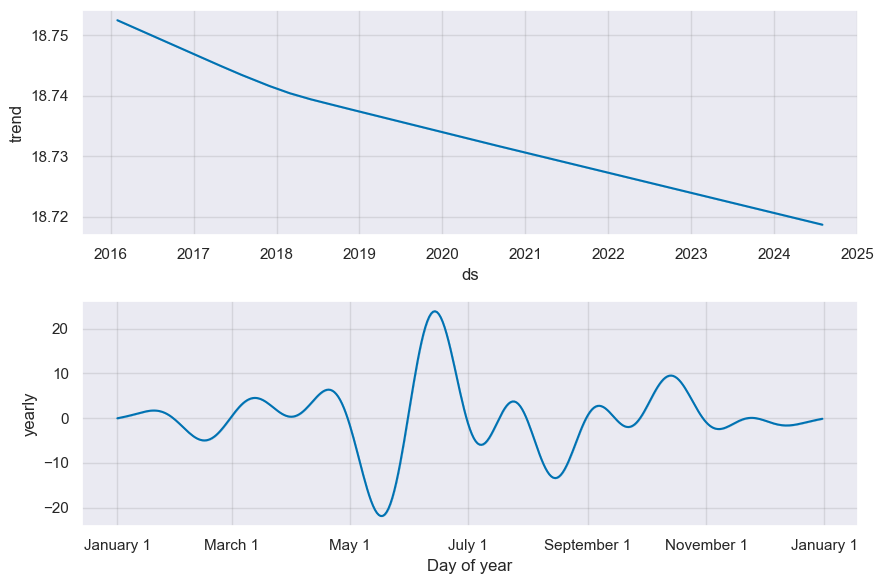

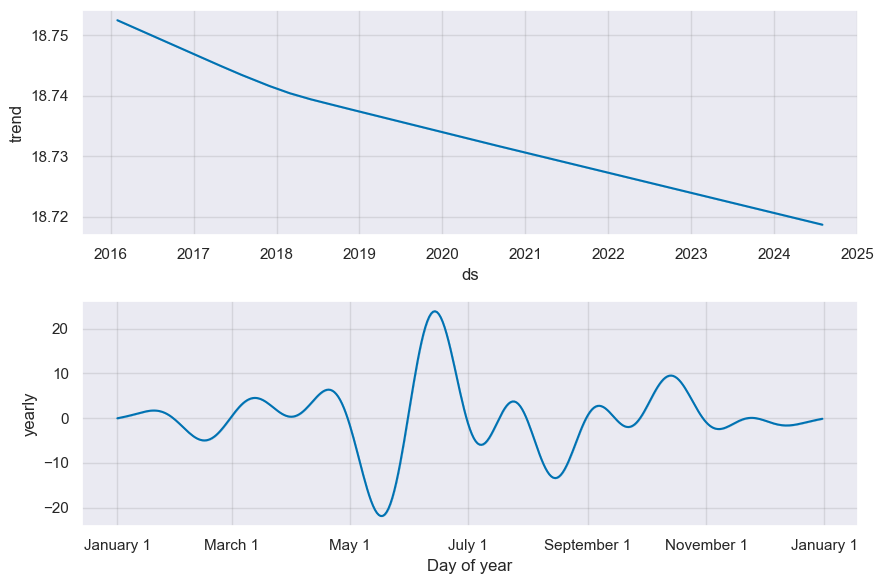

In [48]:
modelo.plot_components(forecast)

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


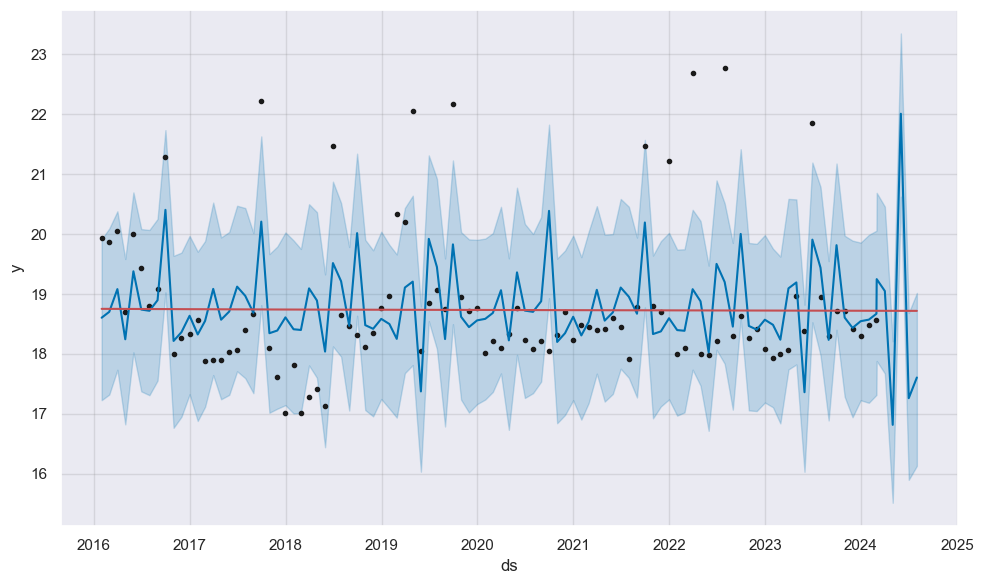

In [49]:
fig = modelo.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), modelo,forecast)

In [50]:
df_p_cv = cross_validation(modelo, initial='720 days',period='180 days',horizon='365 days')
df_p_cv

prophet    INFO  Making 11 forecasts with cutoffs between 2018-03-27 00:00:00 and 2023-03-01 00:00:00
  0%|          | 0/11 [00:00<?, ?it/s]prophet    INFO  n_changepoints greater than number of observations. Using 19.
cmdstanpy  DEBUG input tempfile: /tmp/tmpwwzinfm9/s8ha3tv8.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpwwzinfm9/t6_93kfm.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94383', 'data', 'file=/tmp/tmpwwzinfm9/s8ha3tv8.json', 'init=/tmp/tmpwwzinfm9/t6_93kfm.json', 'output', 'file=/tmp/tmpwwzinfm9/prophet_modell0xokbak/prophet_model-20241126152302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:23:02 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
15:23:03 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done process

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-31,17.372516,17.224784,17.518448,17.282708,2018-03-27
1,2018-04-30,18.008481,17.869769,18.158727,17.419222,2018-03-27
2,2018-05-31,16.261312,16.077388,16.460017,17.133073,2018-03-27
3,2018-06-30,16.273431,16.050982,16.503426,21.462468,2018-03-27
4,2018-07-31,16.929099,16.642203,17.224552,18.655311,2018-03-27
...,...,...,...,...,...,...
127,2023-10-31,18.481711,17.074345,19.773330,18.714621,2023-03-01
128,2023-11-30,18.328705,17.013126,19.752769,18.413283,2023-03-01
129,2023-12-31,18.550648,17.156043,20.051279,18.299040,2023-03-01
130,2024-01-31,18.520764,17.060560,19.844016,18.490260,2023-03-01


In [51]:
df_per = performance_metrics(df_p_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,5.224185,2.285648,1.896058,0.096821,0.091865,0.096268,0.230769
1,39 days,6.443985,2.538501,2.195546,0.110318,0.105198,0.111146,0.153846
2,43 days,5.702240,2.387936,2.022146,0.100708,0.091865,0.102552,0.230769
3,45 days,4.932035,2.220819,1.788676,0.089205,0.091188,0.090022,0.307692
4,49 days,4.516681,2.125249,1.624298,0.081931,0.063650,0.082303,0.384615
...,...,...,...,...,...,...,...,...
115,354 days,3.632846,1.906003,1.270381,0.063762,0.044716,0.066727,0.615385
116,358 days,3.583927,1.893126,1.214839,0.060656,0.036181,0.063697,0.615385
117,359 days,3.581676,1.892532,1.212053,0.060502,0.036181,0.063546,0.615385
118,363 days,1.999051,1.413878,0.878932,0.046047,0.033842,0.047388,0.692308


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


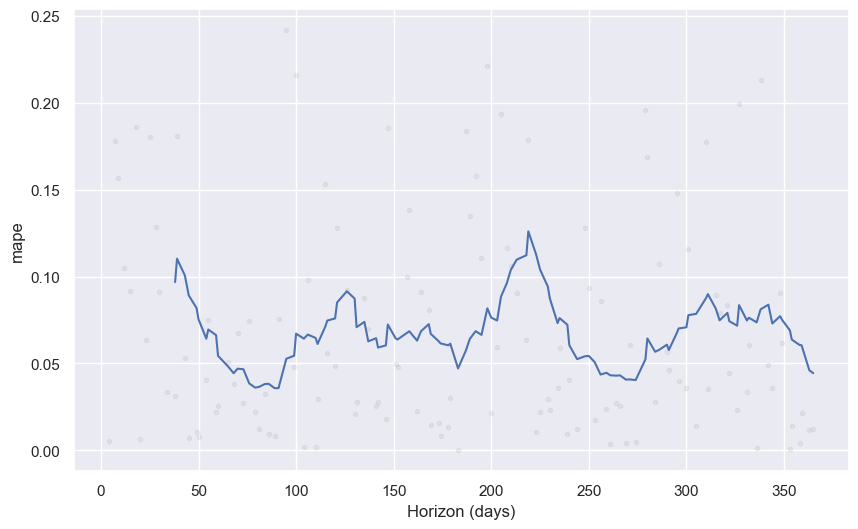

In [52]:
fig = plot_cross_validation_metric(df_p_cv, metric='mape')